# Test Environment

## Utils

### Install required packages:

In [1]:
%%capture
!pip install tensorflow_addons

### Imports

In [2]:
import tensorflow as tf
import keras
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow_addons.layers import InstanceNormalization
import os

### Environment Variables

In [3]:
HEIGHT = 320
WIDTH = 320
CHANNELS = 3

WORK_DIR = os.getcwd()

NOISE_DIM = 100

## Download and load the models

### Download the models

In [4]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1ue1sMHqUXZyZ5RZsUjACZibkZxKKeWXa
!unzip /content/my_files.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ue1sMHqUXZyZ5RZsUjACZibkZxKKeWXa
To: /content/my_files.zip
100% 293M/293M [00:01<00:00, 164MB/s]
Archive:  /content/my_files.zip
  inflating: cycleGAN_monet_generator.h5  
  inflating: __MACOSX/._cycleGAN_monet_generator.h5  
  inflating: DCGAN_monet_generator.h5  
  inflating: __MACOSX/._DCGAN_monet_generator.h5  


### Load the models

In [5]:
cg_gen = tf.keras.models.load_model(WORK_DIR + '/cycleGAN_monet_generator.h5')
dcg_gen = tf.keras.models.load_model(WORK_DIR + '/DCGAN_monet_generator.h5')

## Test the models

### Helper Functions

#### Function to plot a single image/sample

In [6]:
def plot_sample(generated, title):
    plt.title(title)
    plt.imshow(generated)
    plt.axis('off')

#### Function to preprocess image

In [7]:
def preprocess_sample(sample):
    sample = tf.image.resize_with_pad(sample, HEIGHT, WIDTH)  # resizing image
    sample = tf.cast(sample, tf.float32) # change floating point to 32 bits
    sample = (sample / 127.5) - 1 # normalize the image to a [-1, 1] scale
    sample = tf.reshape(sample, (1, HEIGHT, WIDTH, CHANNELS))  # reshape image
    return sample

#### Function to test a given generator model on a given sample

In [8]:
def single_predictor(monet_generator, sample, name, preprocess_image=True, scale_factor=0.5):
  # Preprocess the sample
  if preprocess_image:
    sample = preprocess_sample(sample)

  # Generate image with given generator
  generated = monet_generator(sample, training=False)

  # Scale the image for plotting it
  generated = generated[0] * scale_factor + scale_factor

  # Plot the generated image
  print(f'The generated image by {name}')
  plot_sample(generated, title='Generated Image')

### Upload files from your local file system

Saving test_photo.jpg to test_photo.jpg
User uploaded file "test_photo.jpg" with length 61361 bytes


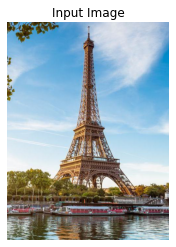

In [9]:
# Upload image
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
filename = next(iter(uploaded))

# Read image as numpy array
sample = mpimg.imread(WORK_DIR + '/' + filename)

# Plot image
plot_sample(sample, title='Input Image')

### Test the monet generator of the CycleGAN

The generated image by CycleGAN Monet Generator


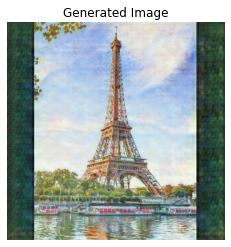

In [10]:
# Generate image with CycleGAN monet generator
single_predictor(cg_gen, sample, name='CycleGAN Monet Generator')

### Test the monet generator of the DCGAN

The generated image by DCGAN Monet Generator


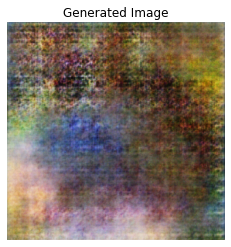

In [12]:
# Create noise
noise = tf.random.normal([1, NOISE_DIM])

# Generate image with DCGANgenerator
single_predictor(dcg_gen, noise, name='DCGAN Monet Generator', preprocess_image=False)